<a href="https://colab.research.google.com/github/cds-group-8/cds-group-8.github.io/blob/main/Ravi_Copy_of_M8_NB_MiniProject_1_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

### Load the data

Load all the given datasets

In [5]:
# YOUR CODE HERE
# Load the CSV files
orders = pd.read_csv('Instacart/orders.csv')
order_products_train = pd.read_csv('Instacart/order_products__train.csv')
products = pd.read_csv('Instacart/products.csv')
aisles = pd.read_csv('Instacart/aisles.csv')
departments = pd.read_csv('Instacart/departments.csv')

# Display basic info and a few rows from each DataFrame
print("Orders:")
print(orders.info())
print(orders.head(), "\n")

print("Order Products Train:")
print(order_products_train.info())
print(order_products_train.head(), "\n")

print("Products:")
print(products.info())
print(products.head(), "\n")

print("Aisles:")
print(aisles.info())
print(aisles.head(), "\n")

print("Departments:")
print(departments.info())
print(departments.head(), "\n")

Orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_p

### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [6]:
# YOUR CODE HERE
#Merge order_products_train with products on 'product_id'
merged_df = pd.merge(order_products_train, products, on='product_id', how='left')

# Merge with aisles on 'aisle_id'
merged_df = pd.merge(merged_df, aisles, on='aisle_id', how='left')

# Step 4: Merge with departments on 'department_id'
merged_df = pd.merge(merged_df, departments, on='department_id', how='left')

# Step 5: Merge with orders on 'order_id'
final_df = pd.merge(merged_df, orders, on='order_id', how='left')

# Display result
print("Final Integrated DataFrame:")
print(final_df.info())
print(final_df.head())

Final Integrated DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   order_id                1384617 non-null  int64  
 1   product_id              1384617 non-null  int64  
 2   add_to_cart_order       1384617 non-null  int64  
 3   reordered               1384617 non-null  int64  
 4   product_name            1384617 non-null  object 
 5   aisle_id                1384617 non-null  int64  
 6   department_id           1384617 non-null  int64  
 7   aisle                   1384617 non-null  object 
 8   department              1384617 non-null  object 
 9   user_id                 1384617 non-null  int64  
 10  eval_set                1384617 non-null  object 
 11  order_number            1384617 non-null  int64  
 12  order_dow               1384617 non-null  int64  
 13  order_hour_of_day       13846

### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [7]:
# YOUR CODE HERE
sns.set(style='whitegrid')
%matplotlib inline

Top 10 Most Ordered Products:
product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
Name: count, dtype: int64


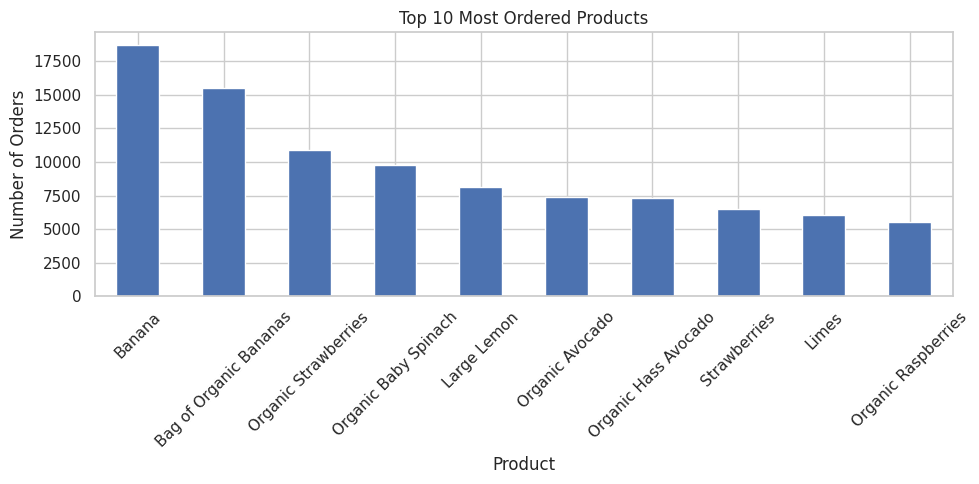

In [8]:
# How many times was each product ordered?
product_order_counts = final_df['product_name'].value_counts()

print("Top 10 Most Ordered Products:")
print(product_order_counts.head(10))

# Optional: visualize top 10
product_order_counts.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Most Ordered Products')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

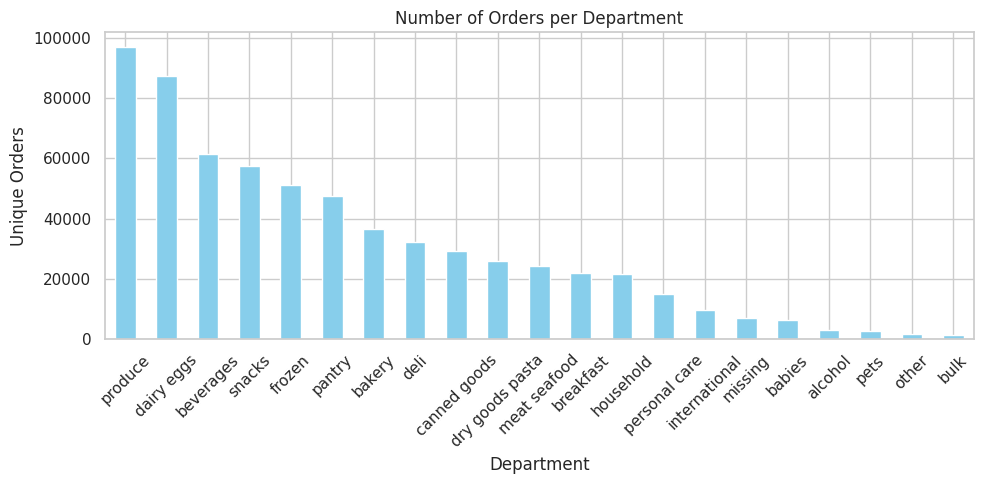

In [9]:
#Number of orders per department
dept_order_counts = final_df.groupby('department')['order_id'].nunique().sort_values(ascending=False)

dept_order_counts.plot(kind='bar', figsize=(10,5), color='skyblue', title='Number of Orders per Department')
plt.ylabel('Unique Orders')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-2358050827.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_labels, y=dow_counts.values, palette='pastel')


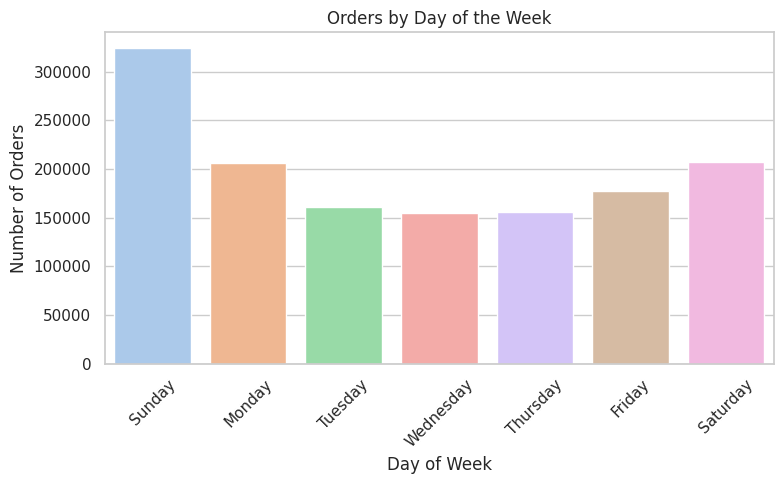

In [10]:
#On which day of the week do customers tend to buy more?
dow_counts = final_df['order_dow'].value_counts().sort_index()

# Mapping Day of Week: 0 = Sunday, 6 = Saturday
dow_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(8,5))
sns.barplot(x=dow_labels, y=dow_counts.values, palette='pastel')
plt.title('Orders by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

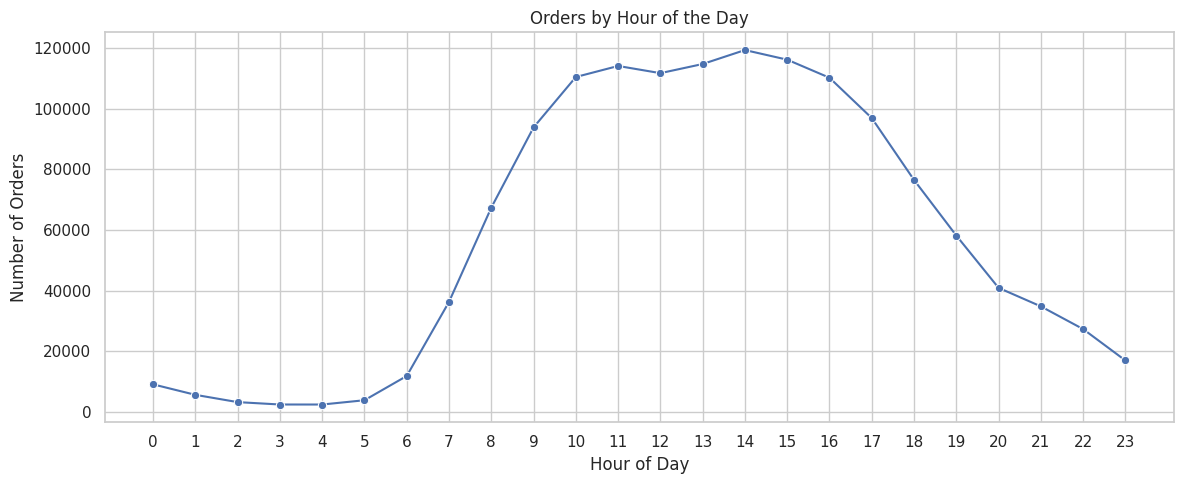

In [11]:
#Peak hours of shopping
hour_counts = final_df['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12,5))
sns.lineplot(x=hour_counts.index, y=hour_counts.values, marker='o')
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

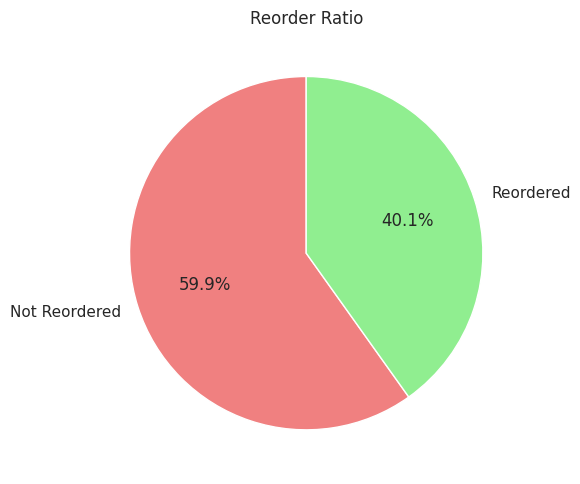

In [12]:
# Ratio of Re-ordered and Not Re-ordered products
reorder_counts = final_df['reordered'].value_counts()

plt.figure(figsize=(6,5))
plt.pie(reorder_counts, labels=['Not Reordered', 'Reordered'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Reorder Ratio')
plt.tight_layout()
plt.show()

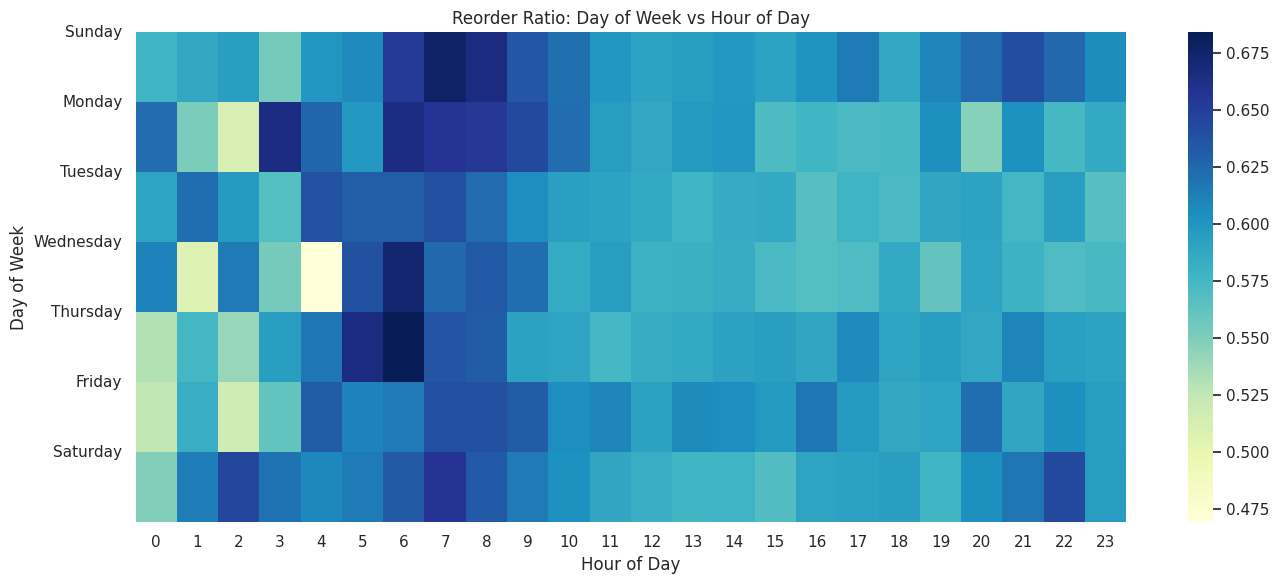

In [13]:
#Heatmap: Reorder Ratio by Day of Week vs Hour of Day
# Calculate reorder ratio by day & hour
pivot = final_df.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().unstack()

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlGnBu', annot=False)
plt.title('Reorder Ratio: Day of Week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=range(7), labels=dow_labels, rotation=0)
plt.tight_layout()
plt.show()

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [16]:
# YOUR CODE HERE

#Drop unwanted columns — keep only order_id and product_name
basket_df = final_df[['order_id', 'product_name']]

#Count frequencies of each product
top_products = basket_df['product_name'].value_counts().head(100).index.tolist()

#Filter only records with those top 100 frequent products
basket_subset = basket_df[basket_df['product_name'].isin(top_products)]

#Create pivot table: order_id as rows, product_name as columns
basket_pivot = basket_subset.assign(present=1).pivot_table(
    index='order_id',
    columns='product_name',
    values='present',
    fill_value=0
)

#Convert any positive values to 1 (in case of aggregation above 1)
basket_final = basket_pivot.applymap(lambda x: 1 if x > 0 else 0)

# Result
print("Basket Shape:", basket_final.shape)
print(basket_final.head())


/tmp/ipython-input-16-1494614452.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_final = basket_pivot.applymap(lambda x: 1 if x > 0 else 0)


Basket Shape: (93850, 100)
product_name  100% Whole Wheat Bread  2% Reduced Fat Milk  \
order_id                                                    
1                                  0                    0   
36                                 0                    0   
38                                 0                    0   
96                                 0                    0   
98                                 0                    0   

product_name  Apple Honeycrisp Organic  Asparagus  Bag of Organic Bananas  \
order_id                                                                    
1                                    0          0                       1   
36                                   0          1                       0   
38                                   0          0                       0   
96                                   0          0                       0   
98                                   0          0                       1   

produ

## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [17]:
# YOUR CODE HERE
# Take a subset of the basket data (e.g., first 100,000 orders)
basket_subset_100k = basket_final.head(100000)

#Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(
    basket_subset_100k,
    min_support=0.01,
    use_colnames=True
)

# Display frequent itemsets
print("Top Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Top Frequent Itemsets:
     support                  itemsets
5   0.199531                  (Banana)
4   0.164944  (Bag of Organic Bananas)
71  0.116079    (Organic Strawberries)
37  0.104251    (Organic Baby Spinach)
28  0.086681             (Large Lemon)


In [18]:
#Generate association rules from the frequent itemsets
rules = association_rules(
    frequent_itemsets,
    metric='lift',   # Can also use 'confidence', 'support'
    min_threshold=1.0
)

# Display rules
print("Top Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

# Convert to DataFrame for further analysis
rules_df = pd.DataFrame(rules)

# Optional: sort by confidence or lift
rules_df_sorted = rules_df.sort_values(by='confidence', ascending=False)

# View top 10 rules
print(rules_df_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

Top Association Rules:
                antecedents               consequents   support  confidence  \
0    (Organic Baby Spinach)  (Bag of Organic Bananas)  0.023825    0.228536   
1  (Bag of Organic Bananas)    (Organic Baby Spinach)  0.023825    0.144444   
2     (Organic Blueberries)  (Bag of Organic Bananas)  0.012115    0.228957   
3  (Bag of Organic Bananas)     (Organic Blueberries)  0.012115    0.073450   
4        (Organic Cucumber)  (Bag of Organic Bananas)  0.013511    0.274875   

       lift  
0  1.385539  
1  1.385539  
2  1.388088  
3  1.388088  
4  1.666476  
                               antecedents               consequents  \
33                    (Organic Fuji Apple)                  (Banana)   
23                      (Honeycrisp Apple)                  (Banana)   
8   (Organic Large Extra Fancy Fuji Apple)  (Bag of Organic Bananas)   
6                   (Organic Hass Avocado)  (Bag of Organic Bananas)   
12                   (Organic Raspberries)  (Bag of Organi